In [1]:
# Command to enable 3d widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



In [2]:
# Loads the movie dataset.
movie_df = pd.read_csv("movie.csv", delimiter=",")

oscars = pd.read_csv("the_oscar_award.csv")


In [3]:
counts = movie_df["movie_imdb_link"].value_counts()

len(counts[counts > 1])

117

In [4]:
movie_df = movie_df.drop_duplicates(subset=["movie_imdb_link"], keep="first")

movie_df["movie_imdb_link"].value_counts().max()

1

In [5]:
counts = movie_df["movie_title"].value_counts()
len(counts[counts > 1])

2

In [6]:
movie_df["movie_title"].fillna(0, inplace=True)

In [7]:
counts = movie_df["movie_title"].value_counts()
counts.head()

The Host            2
Out of the Blue     2
Avatar              1
The Rose            1
Glitter             1
Name: movie_title, dtype: int64

In [8]:
oscars.dropna(how="any", inplace=True)

# Drops all oscar nominations that have not won
oscars = oscars[oscars["winner"]]

oscars.loc[(oscars["film"] == oscars["film"]) & (oscars["year_film"] != oscars["year_film"]), :].shape

(0, 7)

In [9]:
oscars.dropna(how="any", inplace=True)

# Drops all oscar nominations that have not won
oscars = oscars[oscars["winner"]]

oscars.loc[(oscars["film"] == oscars["film"]) & (oscars["year_film"] != oscars["year_film"]), :].shape

(0, 7)

In [10]:
# Drops all oscars but one for each film.
oscars.drop_duplicates("film", keep="last", inplace=True)

oscars.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
11,1927,1928,1,DIRECTING (Comedy Picture),Lewis Milestone,Two Arabian Knights,True
21,1927,1928,1,OUTSTANDING PICTURE,Paramount Famous Lasky,Wings,True
22,1927,1928,1,UNIQUE AND ARTISTIC PICTURE,Fox,Sunrise,True


In [11]:
# Rename column names to match meaning in new dataset.
oscars = oscars.rename({"film" : "movie_title", "winner" : "oscar"}, axis=1)
# We only select the columns we need.
oscars = oscars[["movie_title", "oscar"]]

def quick_clean(movie_data):
    """strips a string and turns all characters to lower caps."""
    return movie_data.lower().strip()

# Cleans the name of the movie title in both datasets.
oscars["movie_title"] = oscars["movie_title"].apply(quick_clean)
movie_df["movie_title"] = movie_df["movie_title"].apply(quick_clean)

# Merges the two datasets on the movie title.
movie_df = pd.merge(movie_df, oscars, on="movie_title", how="left") 
movie_df["oscar"] = movie_df["oscar"].fillna(False)

print(movie_df.shape)

movie_df["oscar"].isna().sum()

(4919, 29)


0

In [12]:
counts = movie_df["movie_title"].value_counts()
counts.head()

the dead zone                                       2
the host                                            2
out of the blue                                     2
avatar                                              1
the haunting in connecticut 2: ghosts of georgia    1
Name: movie_title, dtype: int64

In [13]:
movie_df[movie_df["movie_title"] == "the dead zone"]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,oscar
2662,Color,NaN,18.0,60.0,NaN,186.0,Nicole de Boer,443.0,NaN,Drama|Fantasy|Mystery|Sci-Fi,...,English,Canada,TV-14,NaN,NaN,319.0,7.5,NaN,576,False
3077,Color,David Cronenberg,112.0,103.0,0.0,275.0,Herbert Lom,1000.0,NaN,Horror|Sci-Fi|Thriller,...,English,USA,R,10000000.0,1983.0,278.0,7.2,1.85,0,False


In [14]:
movie_df.isna().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       485
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
oscar                          0
dtype: int64

In [81]:
movie_df_drop = movie_df.drop(['color', 'director_name','plot_keywords','content_rating','genres','title_year','actor_2_facebook_likes','aspect_ratio','num_critic_for_reviews','actor_2_name','actor_3_name','movie_imdb_link','language','country','movie_title','actor_1_name','director_facebook_likes','actor_3_facebook_likes','facenumber_in_poster','actor_1_facebook_likes','num_user_for_reviews','budget','cast_total_facebook_likes','movie_facebook_likes','duration'], axis = 1)

In [82]:
movie_df_drop["imdb_score"].fillna(0, inplace=True)

In [83]:
movie_df_drop["gross"].fillna(0, inplace=True)

In [84]:
movie_df_drop["num_voted_users"].fillna(0, inplace=True)

In [85]:
movie_df_drop.isna().sum()

gross              0
num_voted_users    0
imdb_score         0
oscar              0
dtype: int64

In [86]:
is_categorical = np.where(movie_df_drop.dtypes == 'object')[0]
movie_binary = pd.get_dummies(data = movie_df_drop, columns = movie_df_drop.columns[is_categorical])
movie_binary

,gross,num_voted_users,imdb_score,oscar
0,760505847.0,886204,7.9,True
1,309404152.0,471220,7.1,False
2,200074175.0,275868,6.8,True
3,448130642.0,1144337,8.5,False
4,0.0,8,7.1,False
...,...,...,...,...
4914,0.0,629,7.7,False
4915,0.0,73839,7.5,False
4916,0.0,38,6.3,False
4917,10443.0,1255,6.3,False


In [87]:
X_train, X_test, y_train, y_test = \
train_test_split(movie_binary.drop(['oscar'], axis = 1), \
                 movie_binary['oscar'], train_size = 0.7, random_state = 42)

In [88]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [89]:
model_pred = model.predict(X_test)
np.round(accuracy_score(y_test, model_pred),3) 

0.921

In [90]:
# Itereren over een aantal hyperparameters
max_depth = 200
depths = range(max_depth)
min_leaf = [5,10,25,50]
min_split = [5, 10,25,50]

best_depth = 0
best_leaf = 0
best_split = 0
highscore = 0

for depth in depths[1:]:
    for leaf in min_leaf:
        for split in min_split:
            model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf = leaf, min_samples_split = split)
            model.fit(X_train, y_train)
            model_pred = model.predict(X_test)
            score = accuracy_score(y_test, model_pred) 
            if score > highscore:
                highscore = score
                best_depth = depth
                best_leaf = leaf
                best_split = split

In [97]:
print("Highscore: ", np.round(highscore,3))
print("Best max_depth: ", best_depth)
print("Best min_leaf: ", best_leaf)
print("Best min_split: ", best_split)


Highscore:  0.928
Best max_depth:  7
Best min_leaf:  10
Best min_split:  5


In [92]:
y_pred_baseline = np.zeros(len(y_test))

In [93]:
accuracy_score(y_test, y_pred_baseline)

0.9254742547425474

In [94]:
model = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf = best_leaf, min_samples_split = best_split)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=5)

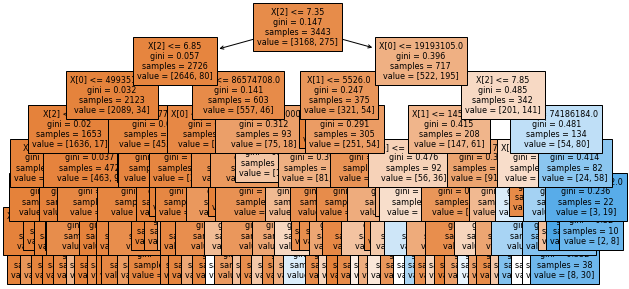

In [95]:
fig = plt.figure(figsize=(10,5))
_ = tree.plot_tree(model, filled=True, fontsize = 8)

NameError: name 'df2' is not defined